In [1]:
import numpy as np
from scipy.linalg import expm, logm

import openqcs as o
import openqcs.spinchain as sp
import openqcs.pqho as pqho
from openqcs.tools import color_matrix

import matplotlib.pyplot as plt

In [2]:
def entanglement_entropy(rho):
    return -np.trace(rho@logm(rho)).real

In [3]:

nbits = 5
dt = 0.01
t_max = 5.0
n_t = int(t_max/dt)
print("n_t = ", n_t)

Nbits = np.arange(2, 8, dtype=int)

data = np.zeros((Nbits.shape[0], n_t, 2), dtype=np.double)

for j, nbits in enumerate(Nbits):
    print("nbits = ", nbits)
    dt = 0.01

    H = sp.H_(0.5, 0.5, N=nbits)
    T = sp.T_(H, dt)

    rho0 = np.matrix([[1,0],[0,0]], dtype=np.complex)


    for i in range(n_t):
        Ks = o.get_kraus_(T**i, nbits=nbits)
        rho = o.channel_(rho0, Ks)
        ee = entanglement_entropy(rho)

        data[j,i,:] = [dt*i, ee]    



n_t =  500
nbits =  2


/home/andreas/anaconda3/lib/python3.7/site-packages/scipy/linalg/_matfuncs_inv_ssq.py:829: LogmExactlySingularWarning: The logm input matrix is exactly singular.
  warnings.warn(exact_singularity_msg, LogmExactlySingularWarning)


nbits =  3
nbits =  4
nbits =  5
nbits =  6
nbits =  7


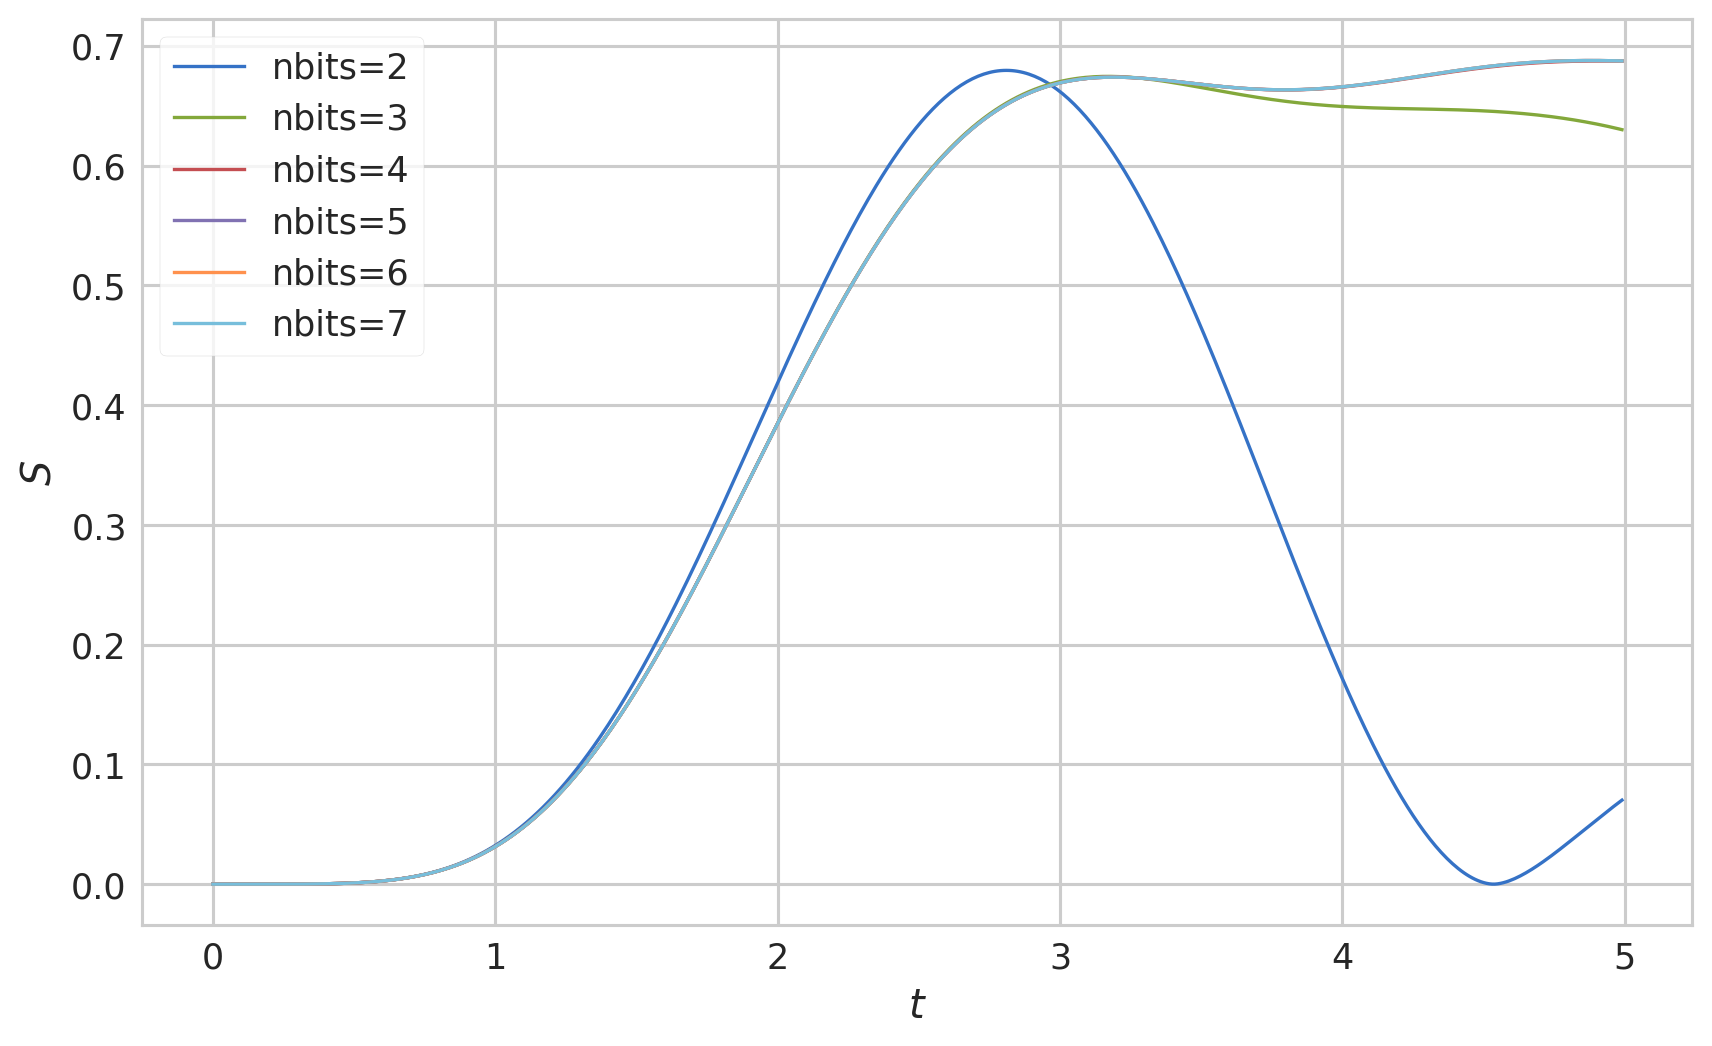

In [4]:
plt.figure(figsize=(10,6),dpi=200)
for i in range(data.shape[0]):
    plt.plot(data[i,:,0], data[i,:,1], label="nbits={}".format(Nbits[i]))

plt.legend()
plt.xlabel("$t$")
plt.ylabel("$S$")
plt.show()

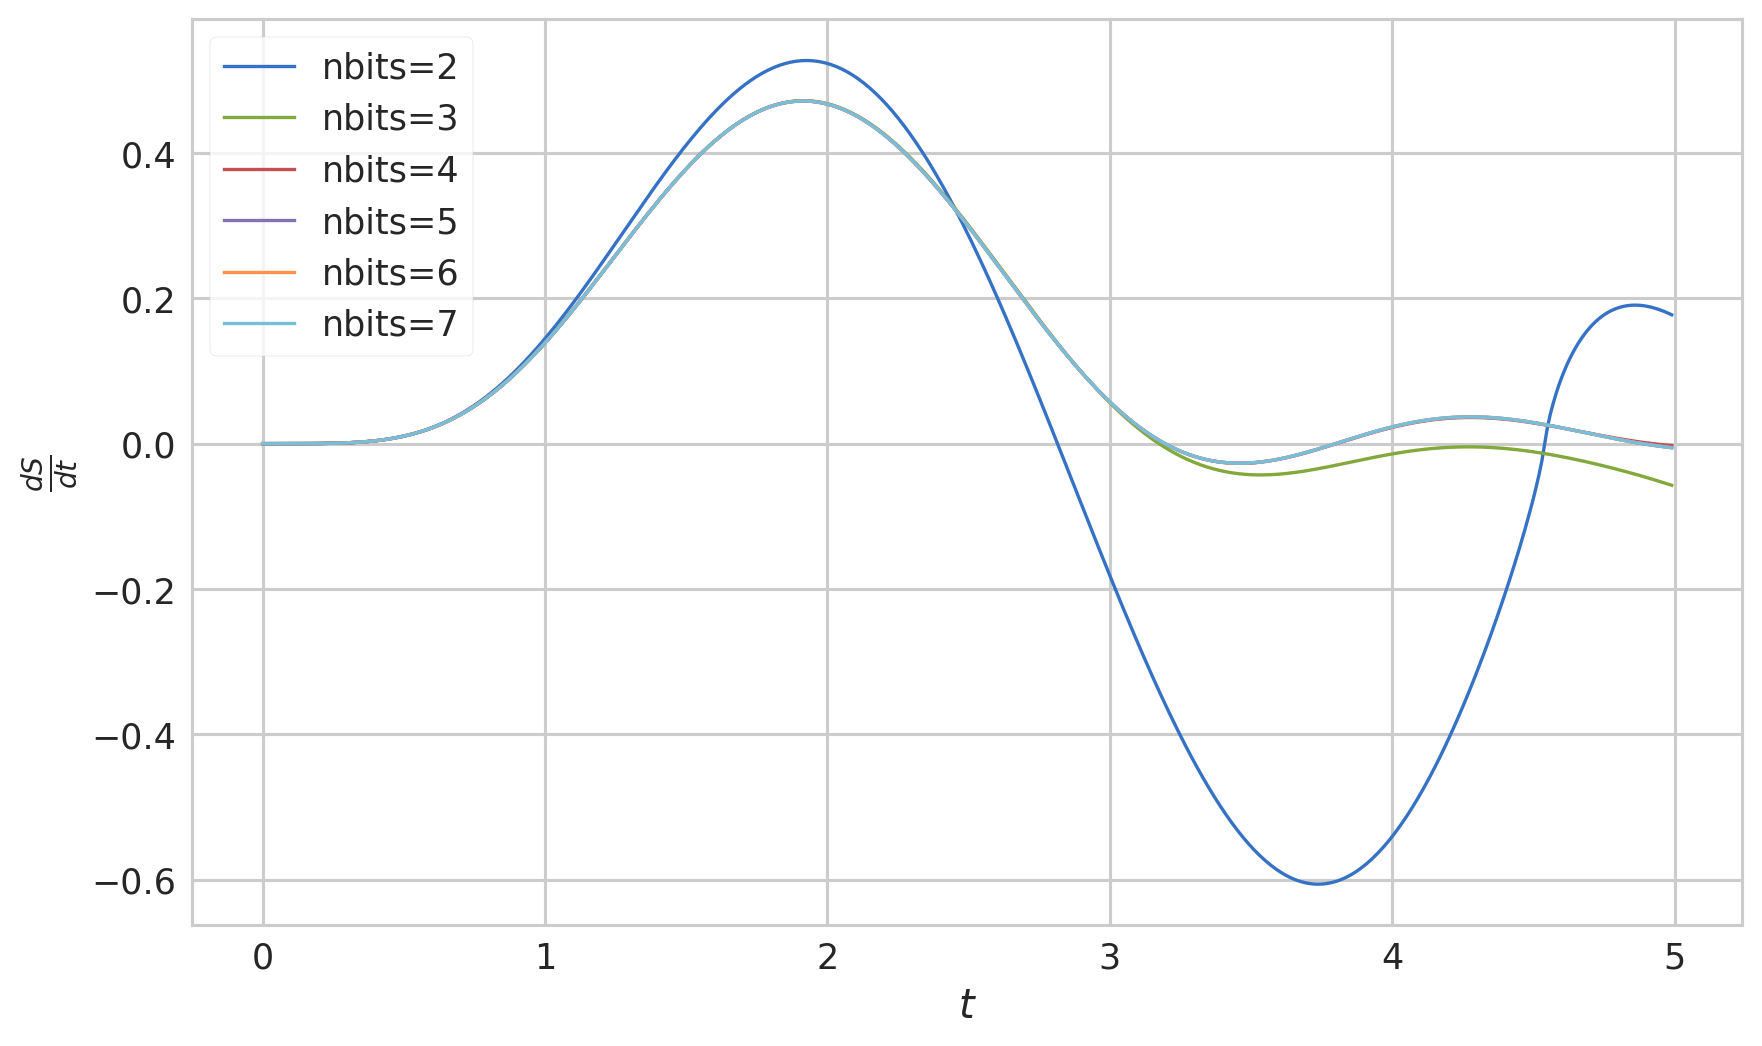

In [5]:
def diff_ee(data, dt=1.0):
    ddata = np.zeros_like(data)
    for i in range(data.shape[0]-1):
        ddata[i+1] = (data[i+1]-data[i])/dt
        
    return ddata

plt.figure(figsize=(10, 6), dpi=200)
for i in range(data.shape[0]):
    tmp_data = diff_ee(data[i,:,1], dt)
    plt.plot(data[i,:,0], tmp_data, label="nbits={}".format(Nbits[i]))
plt.legend()   
plt.xlabel("$t$")
plt.ylabel(r"$\frac{dS}{dt}$")
plt.show()

## 2 qubit system

In [6]:
t_max = 5.0
n_t = int(t_max/dt)
print("n_t = ", n_t)

Nbits = np.arange(3, 8, dtype=int)

data = np.zeros((Nbits.shape[0], n_t, 2), dtype=np.double)

for j,nbits in enumerate(Nbits):
    print("nbits = ", nbits, flush=True)
    dt = 0.01

    H = sp.H_(0.5, 0.5, N=nbits)

    T = sp.T_(H, dt)

    rho0 = np.matrix([[1,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]], dtype=np.complex)

    for i in range(n_t):
        Ks = o.get_kraus_(T**i, sys_bits=[0,1], nbits=nbits)
        rho = o.channel_(rho0, Ks)
        ee = entanglement_entropy(rho)
        data[j,i,:] = [dt*i, ee]


n_t =  500
nbits =  3


/home/andreas/anaconda3/lib/python3.7/site-packages/scipy/linalg/_matfuncs_inv_ssq.py:838: LogmNearlySingularWarning: The logm input matrix may be nearly singular.
  warnings.warn(near_singularity_msg, LogmNearlySingularWarning)


nbits =  4
nbits =  5
nbits =  6
nbits =  7


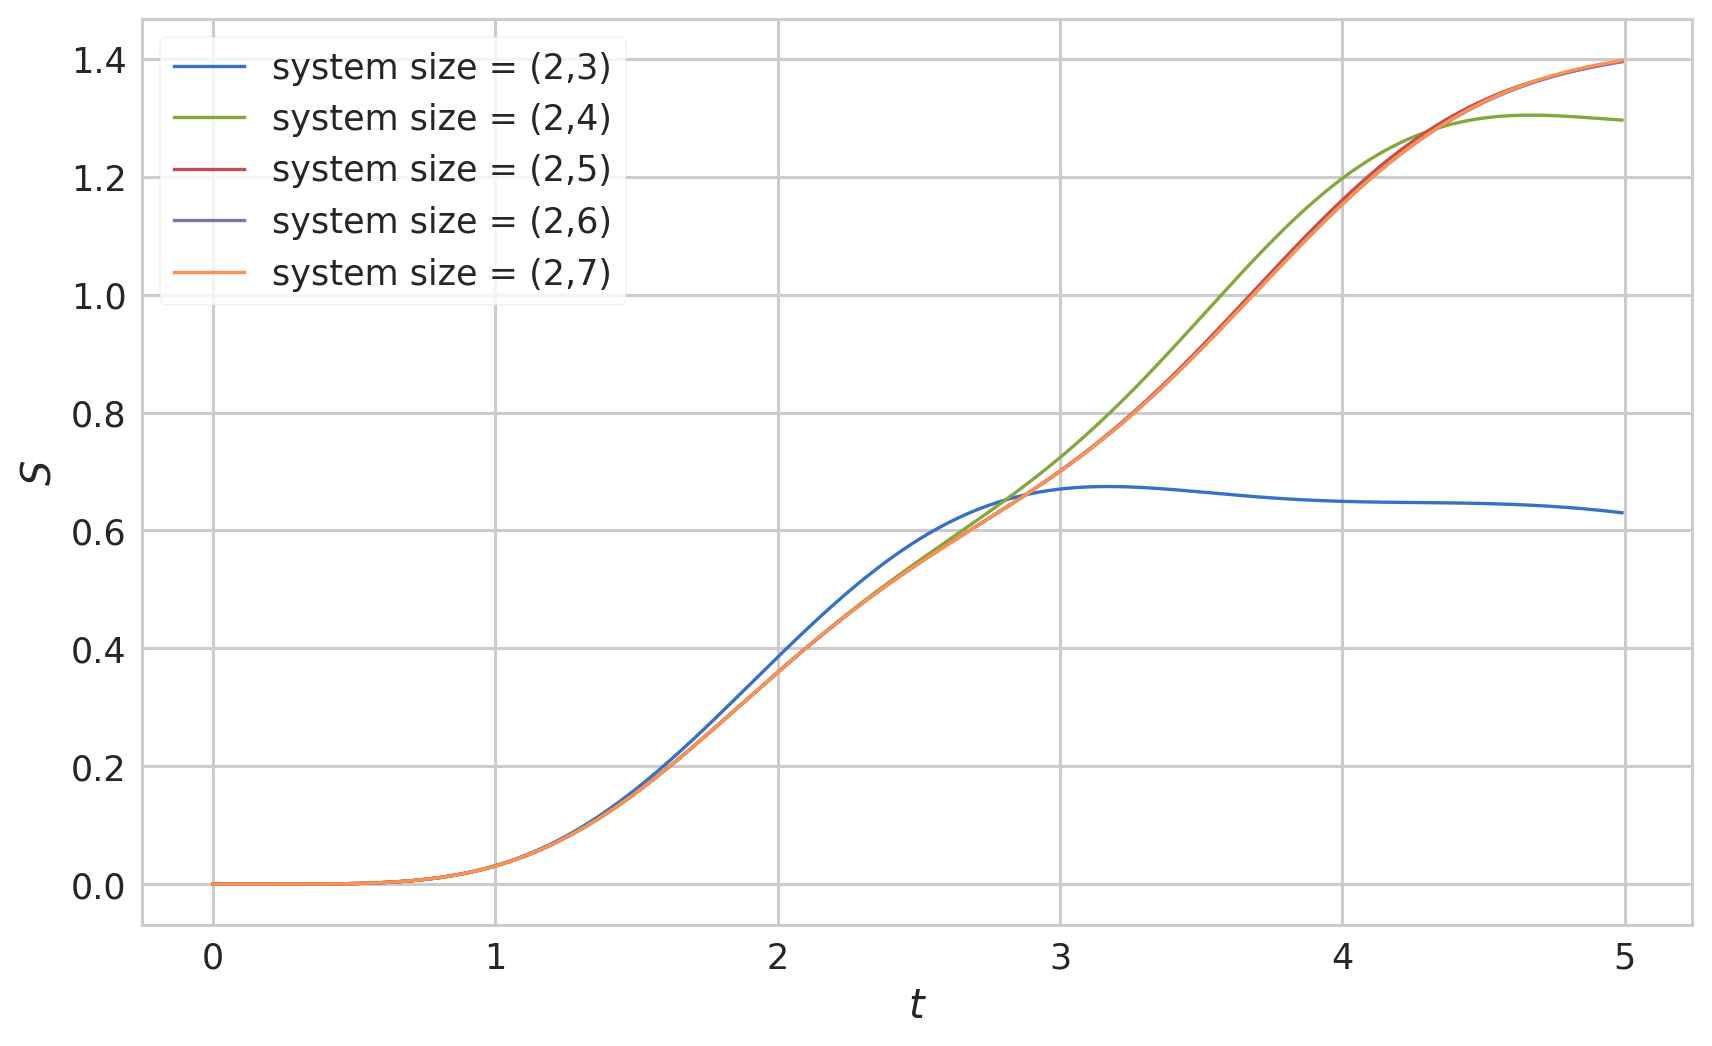

In [10]:
plt.figure(figsize=(10,6),dpi=200)
for i in range(data.shape[0]):
    plt.plot(data[i,:,0], data[i,:,1], label="system size = (2,{})".format(Nbits[i]))

plt.legend()
plt.xlabel("$t$")
plt.ylabel("$S$")
plt.savefig("entanglement_entropy_for_larger_systems.png", format="png")
plt.show()

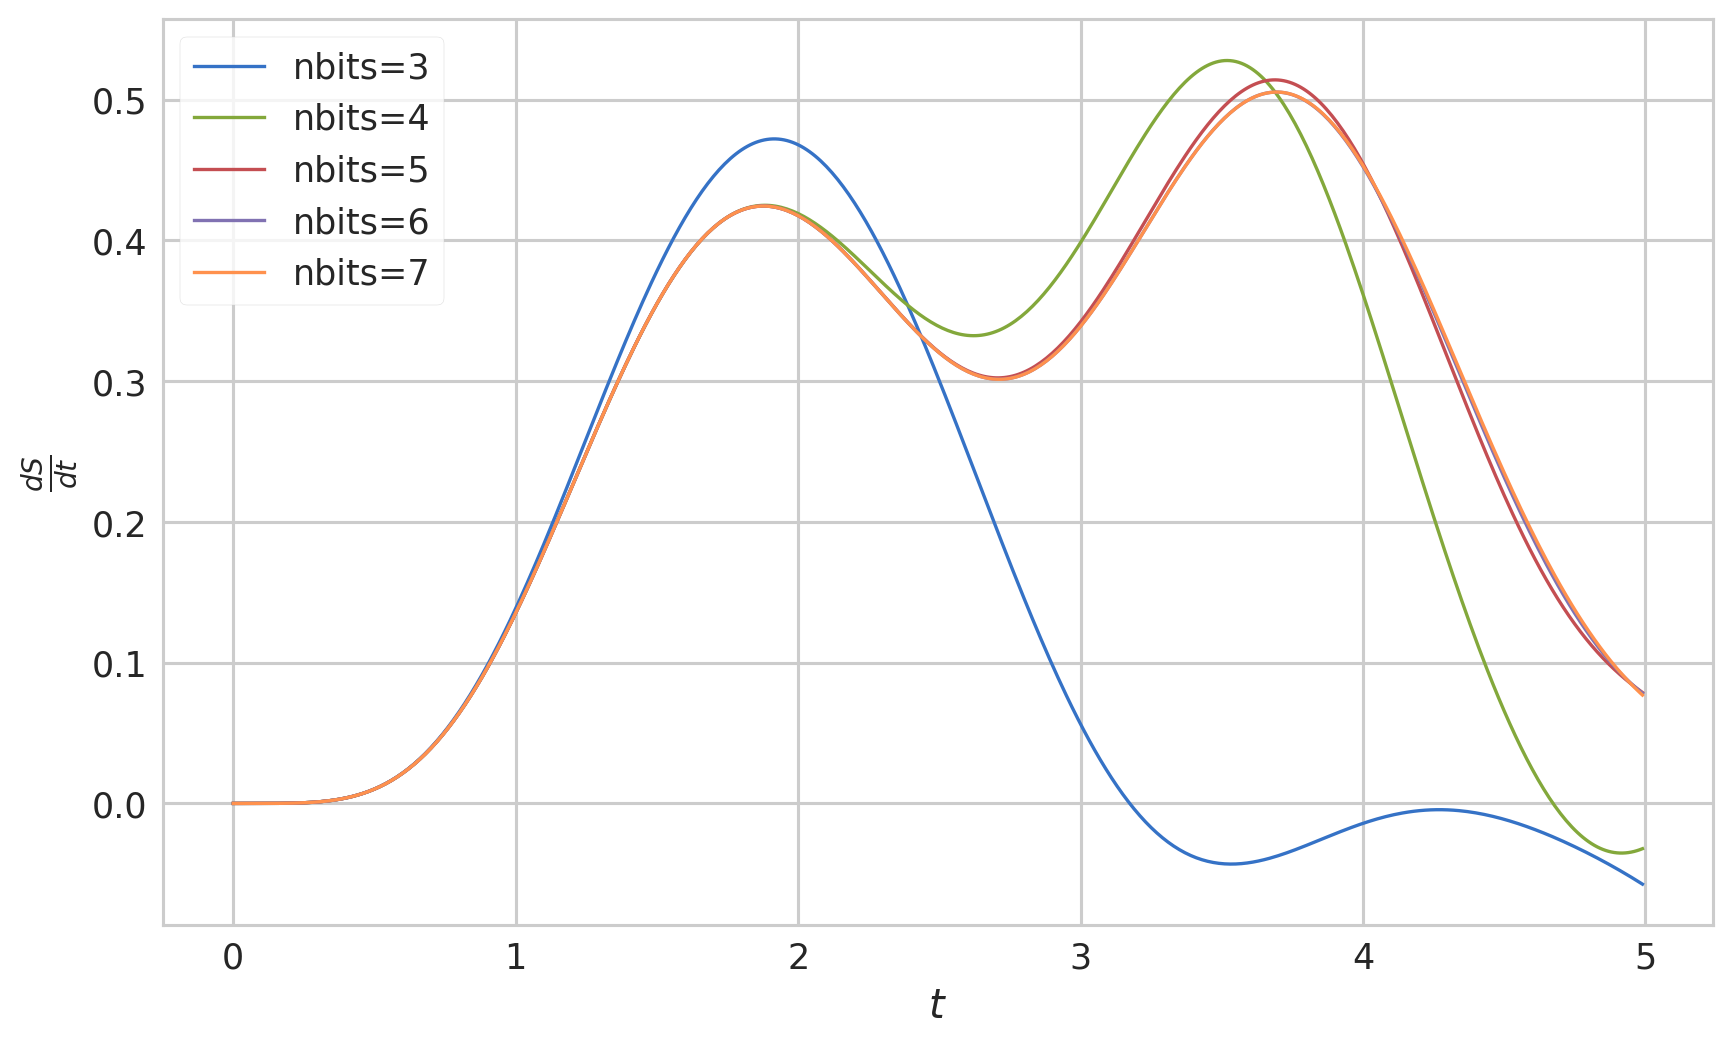

In [8]:
plt.figure(figsize=(10, 6), dpi=200)
for i in range(data.shape[0]):
    tmp_data = diff_ee(data[i,:,1], dt)
    plt.plot(data[i,:,0], tmp_data, label="nbits={}".format(Nbits[i]))
plt.legend()   
plt.xlabel("$t$")
plt.ylabel(r"$\frac{dS}{dt}$")
plt.show()

## Perturbed Quantum Harmonic Oscillator

n_t =  1000
nbits =  2


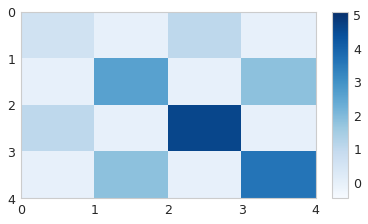

nbits =  3


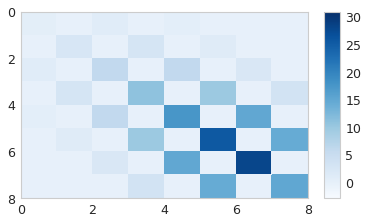

nbits =  4


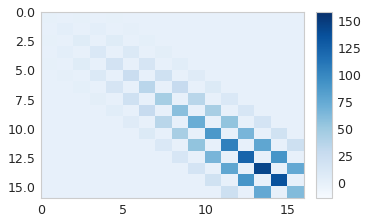

nbits =  5


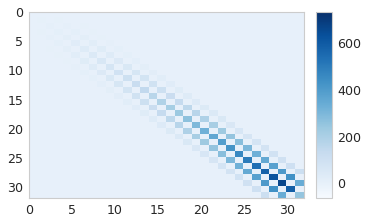

nbits =  6


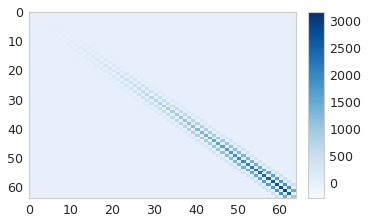

nbits =  7


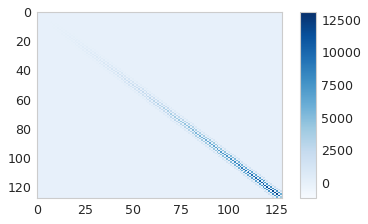

In [20]:
nbits = 5
dt = 0.1
t_max = 100
n_t = int(t_max/dt)
print("n_t = ", n_t)

Nbits = np.arange(2, 8, dtype=int)

data = np.zeros((Nbits.shape[0], n_t, 2), dtype=np.double)

for j, nbits in enumerate(Nbits):
    print("nbits = ", nbits)

    H = pqho.H_(0.5, 0.5, nbits=nbits)
    color_matrix(H)
    T = sp.T_(H, dt)

    rho0 = np.matrix([[1,0],[0,0]], dtype=np.complex)


    for i in range(n_t):
        Ks = o.get_kraus_(T**i, nbits=nbits)
        rho = o.channel_(rho0, Ks)
        ee = entanglement_entropy(rho)

        data[j,i,:] = [dt*i, ee]   
        


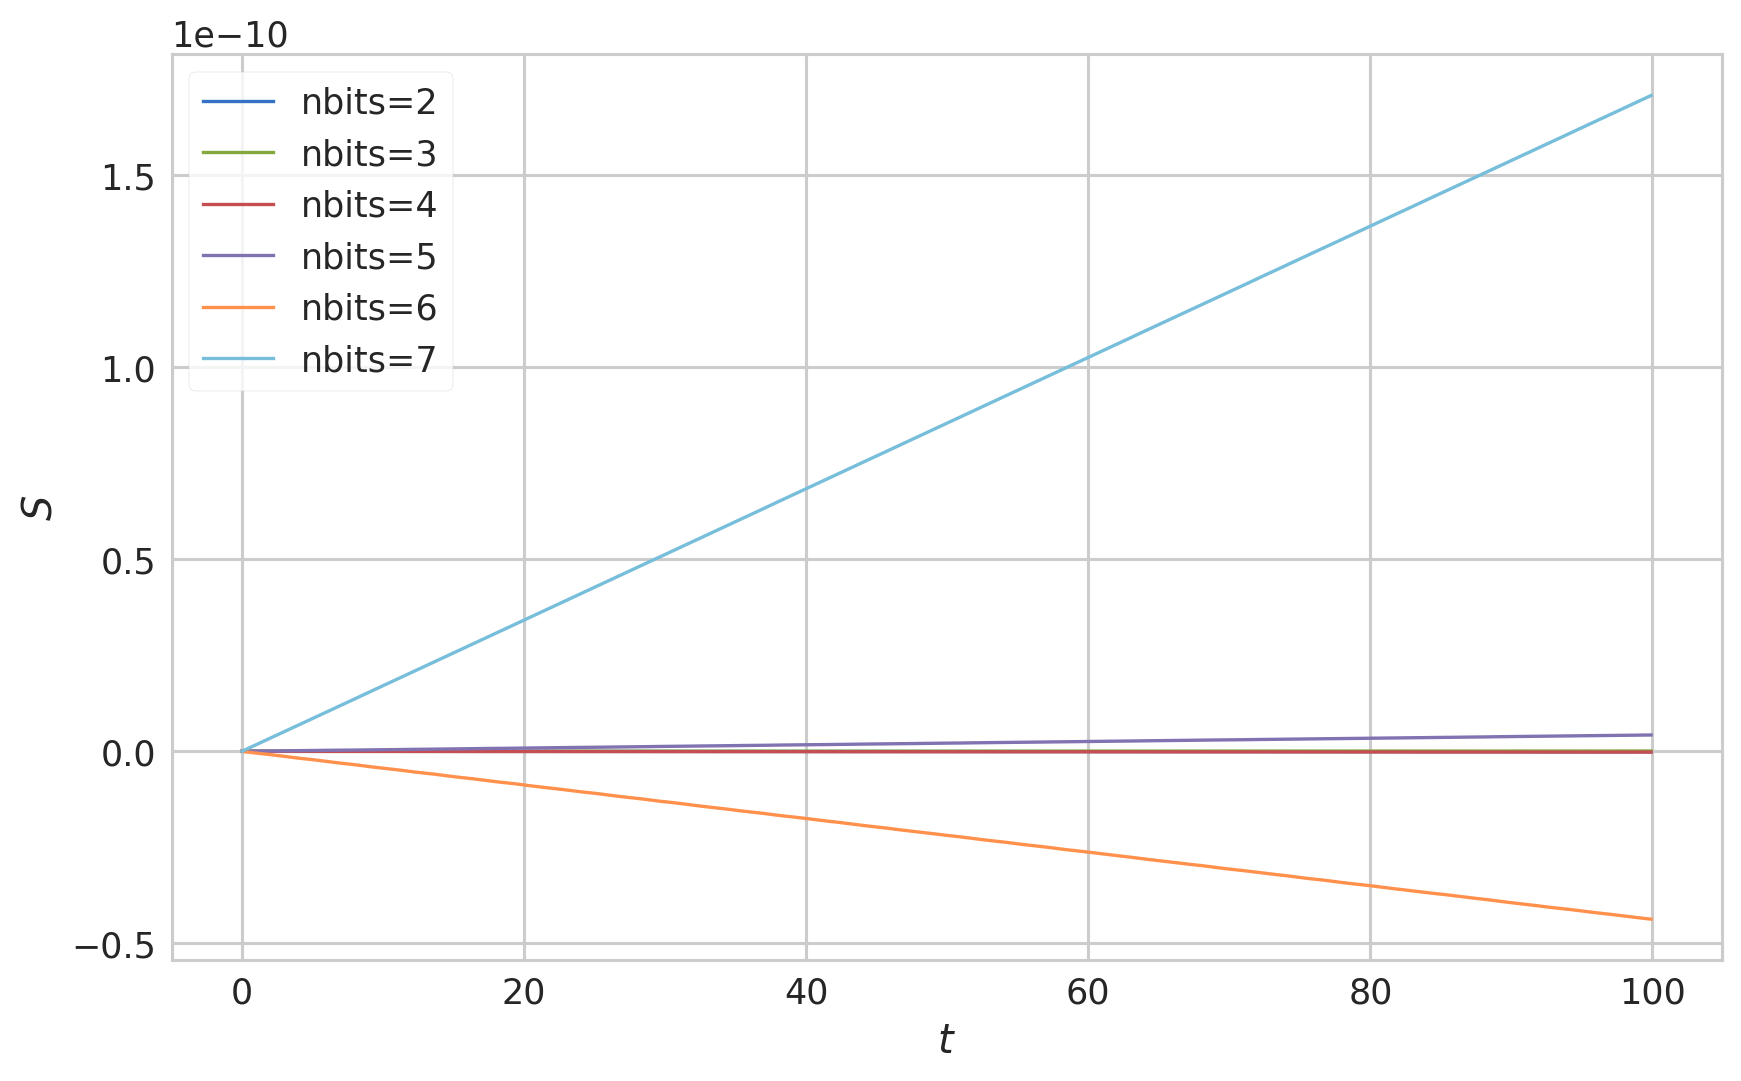

In [21]:
plt.figure(figsize=(10,6),dpi=200)
for i in range(data.shape[0]):
    plt.plot(data[i,:,0], data[i,:,1], label="nbits={}".format(Nbits[i]))

plt.legend()
plt.xlabel("$t$")
plt.ylabel("$S$")
plt.show()